In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np

# Part 1: Load data and plot data

Label  timeset  page id  year of first edit  Edit Counts  \
Categories                                                             
1             0.0      0.0     2115               46051         4809   
2             0.0      0.0     3330               56080         3338   
3             0.0      0.0      998               70100         3542   
4             0.0      0.0     2069               52066         3025   
5             0.0      0.0     4419               68121         4354   
6             0.0      0.0     3179               68153         3538   

            Page Views  number of words  number of images      u-p/e  \
Categories                                                             
1              6860944           156431              1288  20.016490   
2              3132120           160713               723  22.028923   
3              3208032           113601               369  43.876516   
4              2607705            99623               645  21.957280   
5  

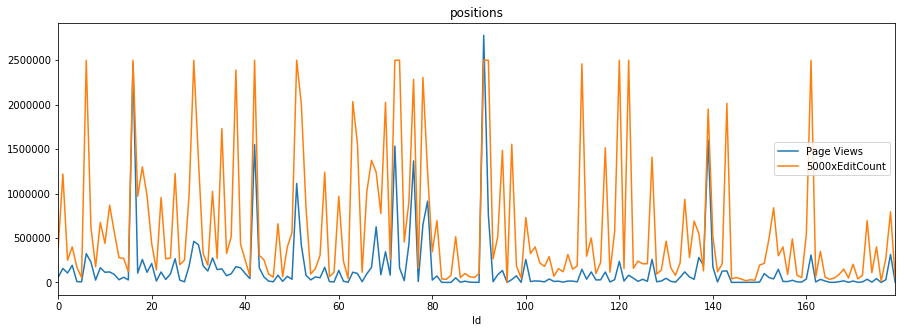

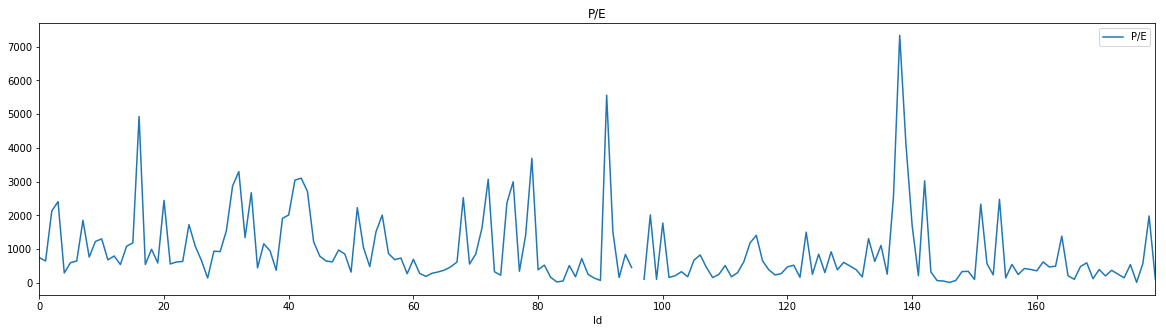

In [106]:
originData = pd.read_csv("WikiProject.csv",index_col=0)
originData.drop(['Label'], axis=1, inplace=True)
originData.drop(['timeset'], axis=1, inplace=True)
originData.drop(['page id'], axis=1, inplace=True)
originData['5000xEditCount'] = originData['Edit Counts'].apply(lambda x: int(x) * 5000)
originData.plot.line(y=['Page Views','5000xEditCount'],title='positions', figsize=(15,5))
originData['P/E'] = (originData['Page Views'] / originData['Edit Counts']).replace(np.inf,np.nan)
originData['U-P/E'] = originData['P/E'] / originData['P/E'].mean()
originData.plot.line(y=['P/E'],title='P/E', figsize=(20,5))
print(originData.groupby('Categories').sum())
print(originData.groupby('Categories').mean())

# part 2: Relabel some col's data

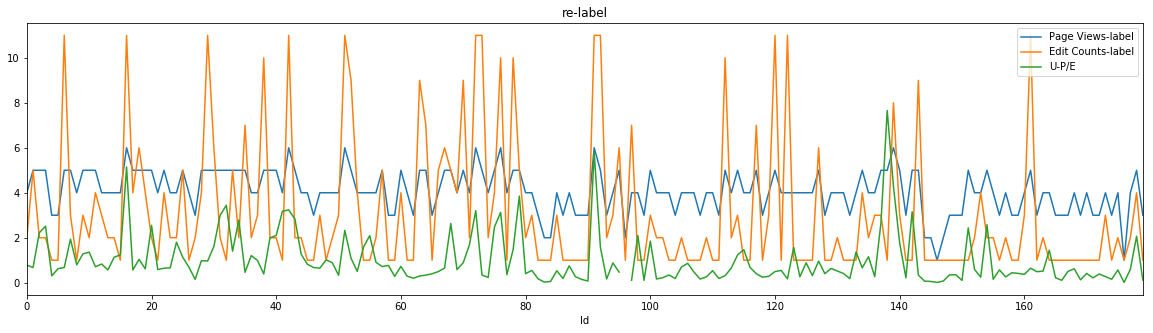

In [107]:
originData['Page Views-label'] = originData['Page Views'].apply(lambda x: int(math.log10(int(x))))
originData['Edit Counts-label'] = originData['Edit Counts'].apply(lambda x: int(int(x) / 50) + 1)
originData.plot.line(y=['Page Views-label', 'Edit Counts-label', 'U-P/E'],title='re-label', figsize=(20,5))
originData.drop(['5000xEditCount'], axis=1, inplace=True)
originData.drop(['P/E'], axis=1, inplace=True)

# Save data to a new csv

In [108]:
originData.to_csv("Database/r_2A.csv")